# Setup

In [ ]:
import numpy as np
import pandas as pd
import re
import glob

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My Drive/Data-X: GGWP Toxic Behavior Public Data/Data/predicted

/content/drive/My Drive/Data-X: GGWP Toxic Behavior Public Data/Data/predicted


In [ ]:
# Threshold for toxic / non-toxic
threshold = .5

In [ ]:
my_files = './*.csv'

Create Pie Chart

In [ ]:
output_dir = '../../images_and_figs/'

In [ ]:
def read_probs(file, threshold, output_dir):
  """
  Function to read the predicted probabilities of each game/platform.
  Also calls a function to create the donut
  """
  df = pd.read_csv(file, index_col='Unnamed: 0')

  # Gets the platform from the file name
  platform_csv = file.split('_')[-1]
  platform = platform_csv[:len(platform_csv) - 4]

  # Creates Donuts
  create_donut(df, threshold, output_dir + file[12:len(file)-4], platform)
  

In [ ]:
def create_donut(df, threshold, output, platform):
  """
  Function to create a donut chart
  """
  all_clean = np.sum(df.iloc[:, 1:] < threshold, 1) == 6

  # Data
  names = ['Not Clean', 'Clean']
  size = [len(all_clean) - sum(all_clean), sum(all_clean)]

  # Create a circle for the center
  my_circle = plt.Circle((0, 0), 0.7, color='#fff9f9')

  # Create Donut
  fig, ax = plt.subplots()
  wedges, labels, wedgeprops = ax.pie(size, labels=names, 
                                      colors=['tab:orange', 'tab:cyan'], 
                                      autopct='%1.0f%%', pctdistance=.85, startangle=90, 
                                      wedgeprops={'linewidth':2, 'edgecolor': '#fff9f9'})
  
  for label in labels:
    label.set_horizontalalignment('center')

  ax.add_artist(my_circle)
  ax.text(0, 0, platform.capitalize(), ha='center', va='center', weight='bold')
  fig.savefig(output + '.png')

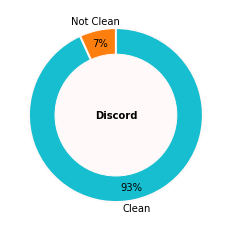

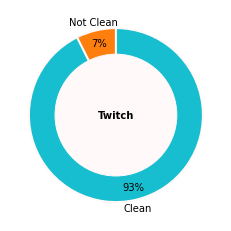

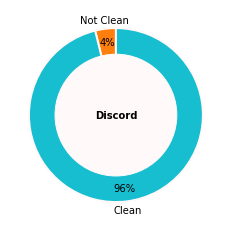

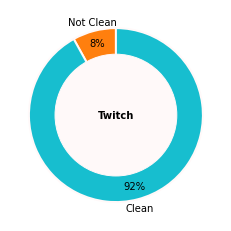

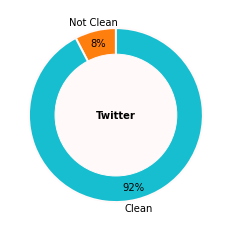

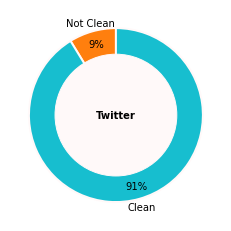

In [ ]:
for file in glob.glob(my_files):
  read_probs(file, threshold, output_dir)